# Numerical Computing :: Project Three
### Julia Troni

The goal of this project is to study what “local” means for convergence of
Newton’s method. Consider the function
$$f(x) = \frac{1}{1 + exp(x)}-0.5 , x ∈ [−5, 5]. $$


- The true root of this function is r = 0. You want to find an interval [a, b]
satisfying two criteria:
    1. The length b − a is as large as possible
    2. Newton’s method converges for any initial guess in the interval, x0 ∈
[a, b].
You’ll determine the interval endpoints a and b using a computer experiment.
Describe the rationale behind your choice of experiment, and report the
results.

----

## Data Visualization

- Graph of $$f(x) = \frac{1}{1 + exp(x)}-0.5 , x ∈ [−5, 5]. $$

<IPython.core.display.Javascript object>


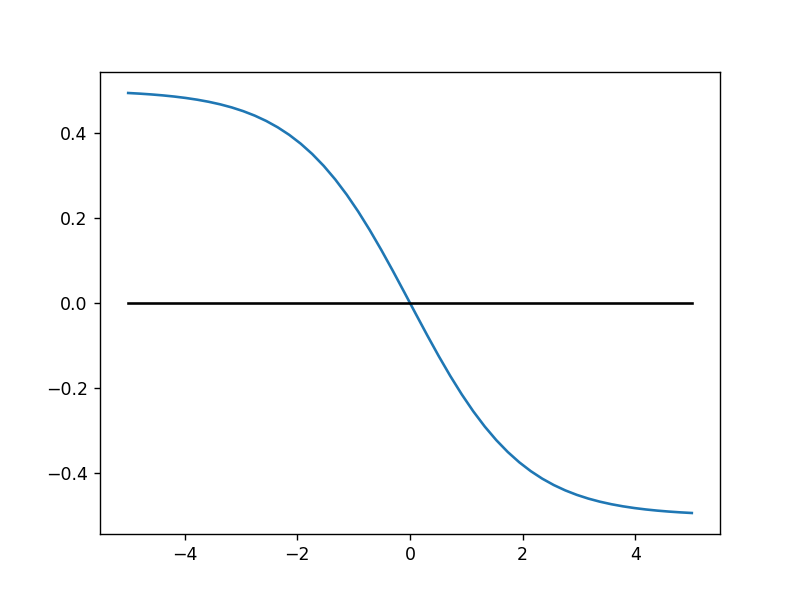

In [1]:
%matplotlib notebook
from matplotlib import pyplot
import numpy
import math

x = numpy.linspace(-5,5)
f1= 1/(1+numpy.exp(x)) -0.5

pyplot.plot(x, f1)
pyplot.plot(x, x*0, color='k')
pyplot.show()

## Method implementations: 
- Below I created a function that applies the Newtons Method to 

$$f(x) = \frac{1}{1 + exp(x)}-0.5 , x ∈ [−5, 5]. $$

The derivative of f is $$f'(x) = \frac{exp(x)}{(1 + exp(x))^2}$$

In [2]:
# Define the equation
def f(x):
    return 1/(1+numpy.exp(x)) -0.5

# Define the first derivative 
def dfdx(x):
    return -(numpy.exp(x))/(1+numpy.exp(x))**2

In [3]:
#  Function to find the root of a given function by using Newtons method
# Input is an initial guess 
# Output is each iteration and the value of the function and if it converges if so to what root 
def NewtonMethod( x0 ):
    max_iter = 20  # Max iterations
    tol = 1E-15  # Tolerance
    i = 0  # Iteration counter
    xi_1 = x0 

    print("Iteration" + str(i) + ": x = " + str(x0) + ", f(x) = " + str(f(x0)))

    # Iterating until either the tolerance or max iterations is met
    while abs(f(xi_1)) > tol or i > max_iter:
        i = i + 1
        xi = xi_1-f(xi_1)/dfdx(xi_1) 
        print("Iteration" + str(i) + ": x = " + str(xi) + ", f(x) = " + str(f(xi)))
        xi_1 = xi
    return xi_1, "Root is x= {0:10.3f}".format(xi_1)

## Numerical experiments
- I started by guessing and checking starting at 5 and slowly getting smaller. Once I narrowed it between 2 and 3, I started stepping by 0.1 
- Finally I got to some number \[2.1,2.2)
- Then I used a simple loop to step even closer


- One idea I tried to implement was some sort of function that tested the NewtonMethod starting at 0 slowly incrementing in a way that tested NewtonsMethod with each initial guess until it found the max a value and likewise min value. I ultimately gave up trying this and am embarrased to say my "experiemental method" was guess and check by hand 

In [4]:
NewtonMethod(2.1)

Iteration0: x = 2.1, f(x) = -0.3909031788043871
Iteration1: x = -1.9218567421573334, f(x) = 0.3723453415179039
Iteration2: x = 1.4217932538188647, f(x) = -0.30561938811154066
Iteration3: x = -0.5298392724419754, f(x) = 0.12944562403614257
Iteration4: x = 0.025140569057883422, f(x) = -0.006284811242648514
Iteration5: x = -2.6484256511541404e-06, f(x) = 6.621064128076171e-07
Iteration6: x = 8.097169107630121e-17, f(x) = 0.0


(8.097169107630121e-17, 'Root is x=      0.000')

In [5]:
NewtonMethod(2.2)

Iteration0: x = 2.2, f(x) = -0.40024951088031485
Iteration1: x = -2.257105170535893, f(x) = 0.4052616529037346
Iteration2: x = 2.468262266078198, f(x) = -0.4218867195833068
Iteration3: x = -3.3903319598455885, f(x) = 0.46740101510002796
Iteration4: x = 11.430720200759236, f(x) = -0.49998914333148925
Iteration5: x = -46042.712971444234, f(x) = 0.5
Iteration6: x = inf, f(x) = -0.5
Iteration7: x = nan, f(x) = nan


C:\Users\julia\AppData\Local\Temp/ipykernel_26880/3017652583.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  xi = xi_1-f(xi_1)/dfdx(xi_1)
C:\Users\julia\AppData\Local\Temp/ipykernel_26880/1975735494.py:7: RuntimeWarning: invalid value encountered in double_scalars
  return -(numpy.exp(x))/(1+numpy.exp(x))**2


(nan, 'Root is x=        nan')

Here we see that 2.2 is too big so lets try smaller steps between 2.1 and 2.2

In [6]:
#removed print statements
def noPrintNewtonMethod( x0 ):
    max_iter = 20  # Max iterations
    tol = 1E-15  # Tolerance
    i = 0  # Iteration counter
    xi_1 = x0 
    
    while abs(f(xi_1)) > tol or i > max_iter:
        i = i + 1
        xi = xi_1-f(xi_1)/dfdx(xi_1) 
        xi_1 = xi
    return xi_1 

In [7]:

#Loop slowly steppign until we find the largest a 
a=2.1
while not ( math.isnan(noPrintNewtonMethod(a)) ):
    print(a)
    a= a+0.01

2.1
2.11
2.1199999999999997
2.1299999999999994
2.1399999999999992
2.149999999999999
2.159999999999999
2.1699999999999986


C:\Users\julia\AppData\Local\Temp/ipykernel_26880/3441919518.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  xi = xi_1-f(xi_1)/dfdx(xi_1)
C:\Users\julia\AppData\Local\Temp/ipykernel_26880/1975735494.py:7: RuntimeWarning: invalid value encountered in double_scalars
  return -(numpy.exp(x))/(1+numpy.exp(x))**2


Thus we see that the largest is 2.169 and I expect the smallest will be -2.169, but lets check for sure

In [8]:
#Loop slowly steppign until we find the smallest b 
b=-2.1
while not ( math.isnan(noPrintNewtonMethod(b)) ):
    print(b)
    b= b-0.01

-2.1
-2.11
-2.1199999999999997
-2.1299999999999994
-2.1399999999999992
-2.149999999999999
-2.159999999999999
-2.1699999999999986


C:\Users\julia\AppData\Local\Temp/ipykernel_26880/1975735494.py:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+numpy.exp(x)) -0.5
C:\Users\julia\AppData\Local\Temp/ipykernel_26880/1975735494.py:7: RuntimeWarning: overflow encountered in exp
  return -(numpy.exp(x))/(1+numpy.exp(x))**2
C:\Users\julia\AppData\Local\Temp/ipykernel_26880/1975735494.py:7: RuntimeWarning: invalid value encountered in double_scalars
  return -(numpy.exp(x))/(1+numpy.exp(x))**2


Thus I find that Newton’s method on f converges for any initial guess in the interval, x0 ∈ [a, b] such that x0 ∈ [-2.169,2.169] 

## Conclusions

- Thus I find that Newton’s method on f converges for any initial guess in the interval, x0 ∈ [a, b] such that x0 ∈ [-2.169,2.169] 

## References

- https://towardsdatascience.com/develop-your-own-newton-raphson-algorithm-in-python-a20a5b68c7dd
- https://computingskillset.com/solving-equations/how-to-find-the-initial-guess-in-newtons-method/

[Aside:] Believe it or not as crappy as this report is, I spent well over 15 hours on this. I was mostly bogged down trying to figure out out to graph the function and implement Newton's method and test the interval in a nice enough way without crashing my notebook. I suppose it did not help that I am not great super familar with matlab or python, although after all this I did learn that python and matlab can be (and often are) used together. 
- I am a bit dissappointed in myself because my "experimental methods" were guess and check which is embarrasing considering I am a CS major and graduating in the Spring. I would like to collaborate with other peers to see how they did this, as I clearly have no clue what I was doing 
- ultimately the largest range of convergence for initial guesses was [-2.169, 2.169]